# Assignment 5

## 1. Choose a REGRESSION dataset (reusing bikeshare is allowed), perform a test/train split, and build a regression model (just like in assignment 3), and calculate the 
    + Training Error (MSE, MAE)
    + Testing Error (MSE, MAE)
## 2. Choose a CLASSIFICATION dataset (not the adult.data set, The UCI repository has many datasets as well as Kaggle), perform test/train split and create a classification model (your choice but DecisionTree is fine). Calculate 
    + Accuracy
    + Confusion Matrix
    + Classifcation Report
    
## 3. (Bonus) See if you can improve the classification model's performance with any tricks you can think of (modify features, remove features, polynomial features)

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams['font.size'] = 14
import pandas as pd
import numpy as np
from sklearn.metrics import (accuracy_score, 
                             classification_report, 
                             confusion_matrix, auc, roc_curve
                            )
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model, metrics, svm
from sklearn.model_selection import train_test_split

## 1. Regression Dataset

## I used dataset from UCI: Seoul Bike Sharing Demand
- independent variable = temperature
- dependent variable = bike rental per hour

In [2]:
#Read the data as 'df1'
df1 = pd.read_csv("SeoulBikeData.csv", encoding='unicode_escape')

df1.head()

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')


,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


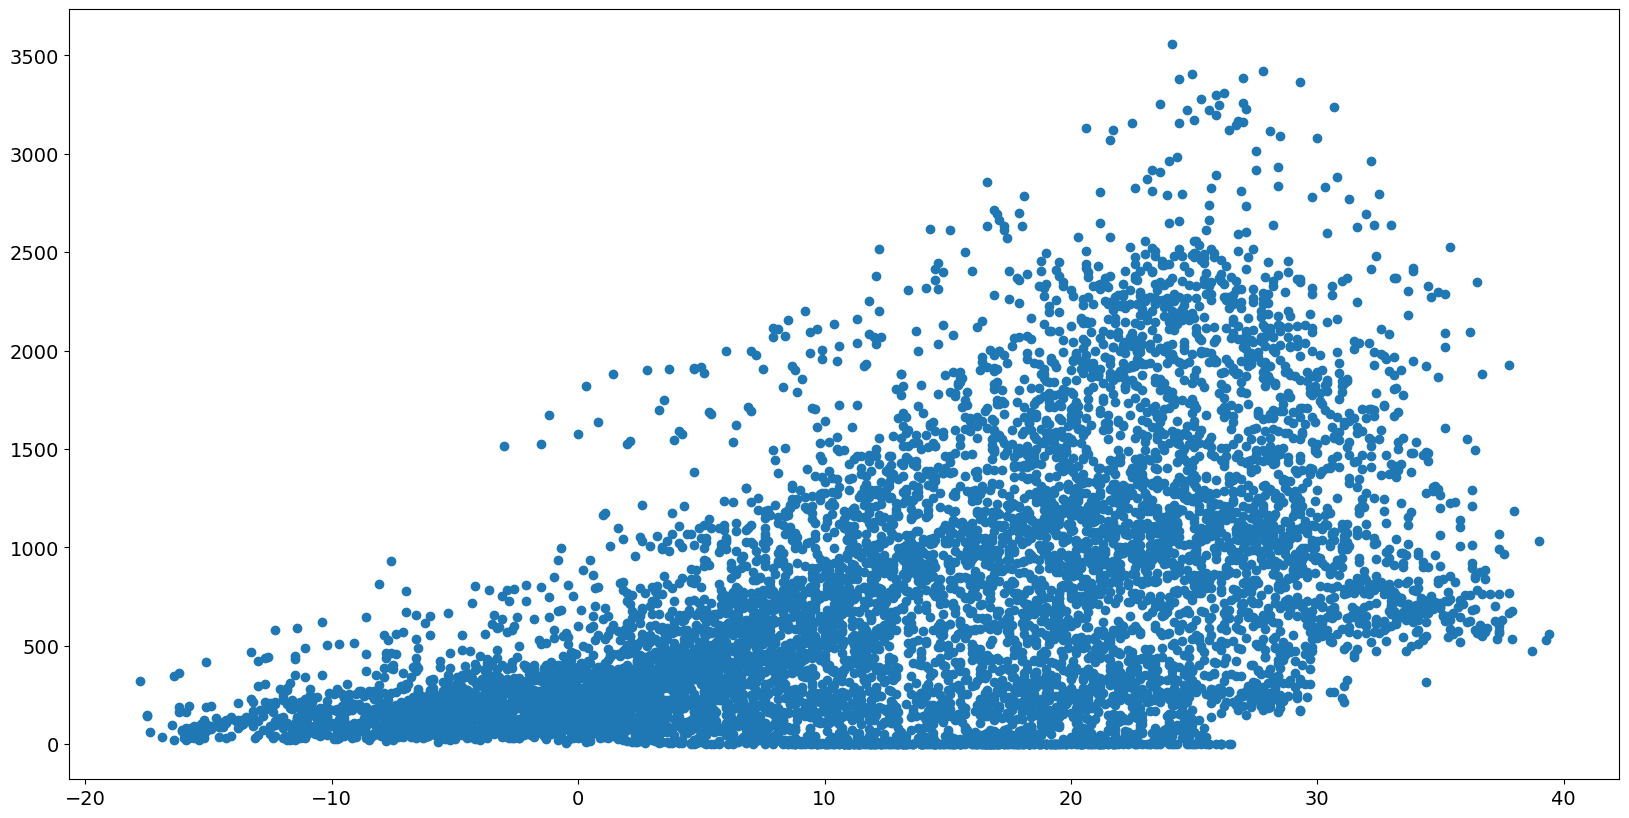

In [3]:
#Plot the independent and dependent variable
plt.scatter(df1["Temperature(°C)"], df1["Rented Bike Count"])

In [4]:
#transform the variables into numpy array (x1=independent variable, y1=dependent variable)
x1=df1[["Temperature(°C)"]].to_numpy()
y1=df1[["Rented Bike Count"]].to_numpy()

#use train_test_split 
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2)

x1.shape, y1.shape, x1_train.shape, x1_test.shape, y1_train.shape, y1_test.shape

((8760, 1), (8760, 1), (7008, 1), (1752, 1), (7008, 1), (1752, 1))

In [5]:
#I will use polynomials 5, 10, 15 and compare the models to find out the best one
poly5 = PolynomialFeatures(degree=5)
poly10 = PolynomialFeatures(degree=10)
poly15 = PolynomialFeatures(degree=15)

#make train and test set for each polynomial
x1_train5 = poly5.fit_transform(x1_train)
x1_train10 = poly10.fit_transform(x1_train)
x1_train15 = poly15.fit_transform(x1_train)

x1_test5 = poly5.fit_transform(x1_test)
x1_test10 = poly10.fit_transform(x1_test)
x1_test15 = poly15.fit_transform(x1_test)

x1_test5.shape, x1_test10.shape, x1_test15.shape

((1752, 6), (1752, 11), (1752, 16))

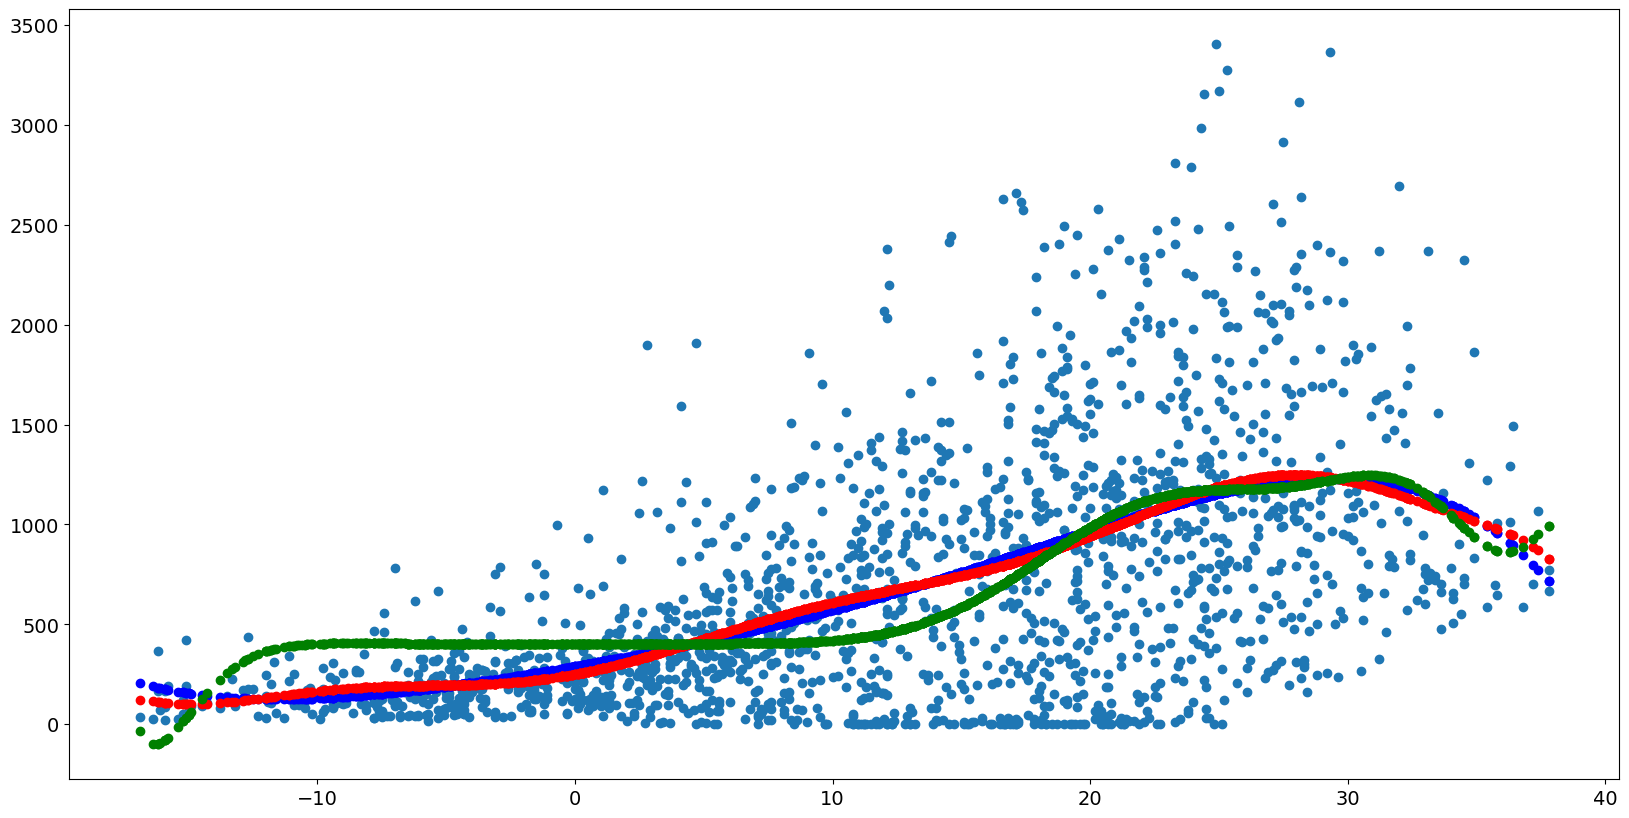

In [6]:
#Conduct linear regression for each polynomial model
linear5 = linear_model.LinearRegression()
linear5.fit(x1_train5, y1_train)

linear10 = linear_model.LinearRegression()
linear10.fit(x1_train10, y1_train)

linear15 = linear_model.LinearRegression()
linear15.fit(x1_train15, y1_train)

#Plot prediction values of each model
plt.scatter(x1_test, y1_test)
plt.scatter(x1_test, linear5.predict(x1_test5), c = 'b')
plt.scatter(x1_test, linear10.predict(x1_test10), c = 'r')
plt.scatter(x1_test, linear15.predict(x1_test15), c = 'g')

In [7]:
#find MSE, MAE for test sets
(
    metrics.mean_squared_error(y1_test, linear5.predict(x1_test5)), 
    metrics.mean_squared_error(y1_test, linear10.predict(x1_test10)),
    metrics.mean_squared_error(y1_test, linear15.predict(x1_test15))
)

(274179.53590155765, 273626.21288796526, 289169.25050955685)

In [8]:
(
    metrics.mean_absolute_error(y1_test, linear5.predict(x1_test5)), 
    metrics.mean_absolute_error(y1_test, linear10.predict(x1_test10)),
    metrics.mean_absolute_error(y1_test, linear15.predict(x1_test15))
)

(381.0137121814291, 380.8880166212398, 409.43767973719514)

In [9]:
#find MSE, MAE for train set
(
    metrics.mean_squared_error(y1_train, linear5.predict(x1_train5)), 
    metrics.mean_squared_error(y1_train, linear10.predict(x1_train10)),
    metrics.mean_squared_error(y1_train, linear15.predict(x1_train15))
)

(291169.29070432915, 290328.57421383704, 305995.4819886549)

In [10]:
(
    metrics.mean_absolute_error(y1_train, linear5.predict(x1_train5)), 
    metrics.mean_absolute_error(y1_train, linear10.predict(x1_train10)),
    metrics.mean_absolute_error(y1_train, linear15.predict(x1_train15))
)

(395.359640552651, 394.41369836404346, 421.06795381053126)

### Conclusion: the error of train set is lower than the error of test set
### (However, the data is too much scattered and needs to be grouped into daily basis to advance fitting)

## 2. Classification Dataset

## I used a dataset from UCI: Wine Quality
- Classifying good wine (score >= 6) and normal wine (score <5)
- Using Support Vector Machines(SVM) Model

In [11]:
# read the dataset as 'df2'
df2 = pd.read_csv("winequality-red.csv")

df2

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [12]:
# transform the values in the column 'quality' into binary values
# quality 6-10 is good wine and quality 1-5 is normal wine

df2['quality'] = df2.quality.between(6,10).astype(int)
df2

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


In [13]:
df2.quality.value_counts()

quality
1    855
0    744
Name: count, dtype: int64

In [14]:
#use train_test_split 
x2_train, x2_test, y2_train, y2_test = train_test_split(df2.drop(['quality'], axis=1), df2.quality, test_size=.20)

x2_train.shape, x2_test.shape, y2_train.shape, y2_test.shape

((1279, 11), (320, 11), (1279,), (320,))

In [15]:
#define 'model' for SVC

model=svm.SVC()
model.fit(x2_train, y2_train)

SVC()

In [16]:
#define 'predictions' for prediction value
predictions = model.predict(x2_test)
predictions.shape

(320,)

In [17]:
#print accuracy score

print(accuracy_score(y2_test, predictions))

0.5875


In [18]:
#print confusion matrix

print(confusion_matrix(y2_test, predictions))

[[ 48 103]
 [ 29 140]]


In [19]:
#print classification report
print(classification_report(y2_test, predictions))

              precision    recall  f1-score   support

           0       0.62      0.32      0.42       151
           1       0.58      0.83      0.68       169

    accuracy                           0.59       320
   macro avg       0.60      0.57      0.55       320
weighted avg       0.60      0.59      0.56       320



## 3. Bonus

- As sulphates does not seem much related with quality, removing the feature 'sulphates' may improve the model

In [20]:
# use same dataset as Assignment 2 and convert 'quality' column into binary values
df3 = pd.read_csv("winequality-red.csv")

df3['quality'] = df3.quality.between(6,10).astype(int)
df3

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


In [21]:
# use train/test split removing 'sulphates'
x3_train, x3_test, y3_train, y3_test = train_test_split(df3.drop(['quality', 'sulphates'], axis=1), df3.quality, test_size=.20)

x3_train.shape, x3_test.shape, y3_train.shape, y3_test.shape

((1279, 10), (320, 10), (1279,), (320,))

In [22]:
#define 'model2' for SVC

model2=svm.SVC()
model2.fit(x3_train, y3_train)

SVC()

In [23]:
predictions2 = model2.predict(x3_test)
predictions2.shape

(320,)

In [24]:
#print classification report
print(classification_report(y3_test, predictions2))

              precision    recall  f1-score   support

           0       0.64      0.38      0.48       142
           1       0.63      0.83      0.71       178

    accuracy                           0.63       320
   macro avg       0.63      0.61      0.60       320
weighted avg       0.63      0.63      0.61       320



### It worked! all scored went up without the feature 'sulphate'